In [ ]:
import pandas as pd
import zipfile
import os

# Define paths
zip_path = "/content/drive/MyDrive/Obesity Prediction Dataset.zip"
extract_path = "/content/Obesity Prediction Dataset"

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List extracted files
extracted_files = os.listdir(extract_path)
print("Extracted Files:", extracted_files)

# Load CSV file (assuming the dataset is in CSV format)
csv_files = [file for file in extracted_files if file.endswith(".csv")]
if csv_files:
    data_path = os.path.join(extract_path, csv_files[0])
    df = pd.read_csv(data_path, encoding="latin-1")
    print("\nDataset Loaded Successfully!")
else:
    print("No CSV file found in extracted dataset.")


Extracted Files: ['Obesity prediction.csv']

Dataset Loaded Successfully!


In [ ]:
# Display basic info
print("\nDataset Info:")
print(df.info())





Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), obj

In [ ]:
print(df.isnull())

      Gender    Age  Height  Weight  family_history   FAVC   FCVC    NCP  \
0      False  False   False   False           False  False  False  False   
1      False  False   False   False           False  False  False  False   
2      False  False   False   False           False  False  False  False   
3      False  False   False   False           False  False  False  False   
4      False  False   False   False           False  False  False  False   
...      ...    ...     ...     ...             ...    ...    ...    ...   
2106   False  False   False   False           False  False  False  False   
2107   False  False   False   False           False  False  False  False   
2108   False  False   False   False           False  False  False  False   
2109   False  False   False   False           False  False  False  False   
2110   False  False   False   False           False  False  False  False   

       CAEC  SMOKE   CH2O    SCC    FAF    TUE   CALC  MTRANS  Obesity  
0     False  F

In [ ]:

# Display first few rows
print("\nSample Data:")
print(df.head())


Sample Data:
   Gender   Age  Height  Weight family_history FAVC  FCVC  NCP       CAEC  \
0  Female  21.0    1.62    64.0            yes   no   2.0  3.0  Sometimes   
1  Female  21.0    1.52    56.0            yes   no   3.0  3.0  Sometimes   
2    Male  23.0    1.80    77.0            yes   no   2.0  3.0  Sometimes   
3    Male  27.0    1.80    87.0             no   no   3.0  3.0  Sometimes   
4    Male  22.0    1.78    89.8             no   no   2.0  1.0  Sometimes   

  SMOKE  CH2O  SCC  FAF  TUE        CALC                 MTRANS  \
0    no   2.0   no  0.0  1.0          no  Public_Transportation   
1   yes   3.0  yes  3.0  0.0   Sometimes  Public_Transportation   
2    no   2.0   no  2.0  1.0  Frequently  Public_Transportation   
3    no   2.0   no  2.0  0.0  Frequently                Walking   
4    no   2.0   no  0.0  0.0   Sometimes  Public_Transportation   

               Obesity  
0        Normal_Weight  
1        Normal_Weight  
2        Normal_Weight  
3   Overweight_Level

In [ ]:
# Fill missing values for categorical and numerical columns
df.fillna(df.median(numeric_only=True), inplace=True)  # Fill numerical missing values with median
df.fillna("Unknown", inplace=True)  # Fill categorical missing values with "Unknown"

print("\nMissing Values After Handling:")
print(df.isnull().sum())



Missing Values After Handling:
Gender            0
Age               0
Height            0
Weight            0
family_history    0
FAVC              0
FCVC              0
NCP               0
CAEC              0
SMOKE             0
CH2O              0
SCC               0
FAF               0
TUE               0
CALC              0
MTRANS            0
Obesity           0
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply Label Encoding
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

print("\nCategorical Data After Encoding:")
print(df.head())



Categorical Data After Encoding:
   Gender   Age  Height  Weight  family_history  FAVC  FCVC  NCP  CAEC  SMOKE  \
0       0  21.0    1.62    64.0               1     0   2.0  3.0     2      0   
1       0  21.0    1.52    56.0               1     0   3.0  3.0     2      1   
2       1  23.0    1.80    77.0               1     0   2.0  3.0     2      0   
3       1  27.0    1.80    87.0               0     0   3.0  3.0     2      0   
4       1  22.0    1.78    89.8               0     0   2.0  1.0     2      0   

   CH2O  SCC  FAF  TUE  CALC  MTRANS  Obesity  
0   2.0    0  0.0  1.0     3       3        1  
1   3.0    1  3.0  0.0     2       3        1  
2   2.0    0  2.0  1.0     1       3        1  
3   2.0    0  2.0  0.0     1       4        5  
4   2.0    0  0.0  0.0     2       3        6  


<ipython-input-7-822aa79b20e9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Obesity'], palette="viridis")


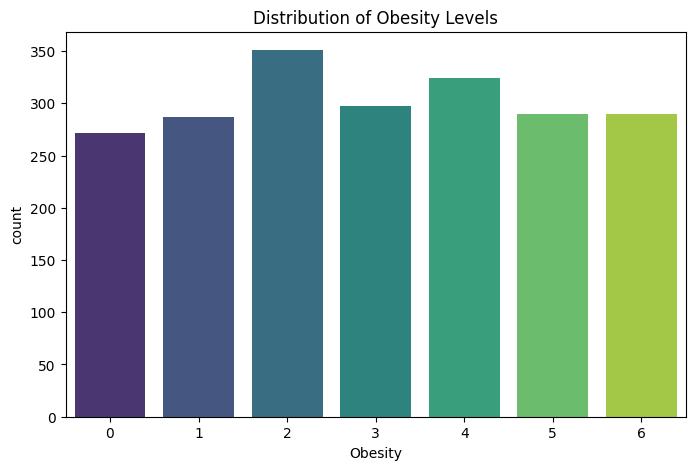

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of obesity levels (assuming 'Obesity' is the target column)
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Obesity'], palette="viridis")
plt.title("Distribution of Obesity Levels")
plt.show()




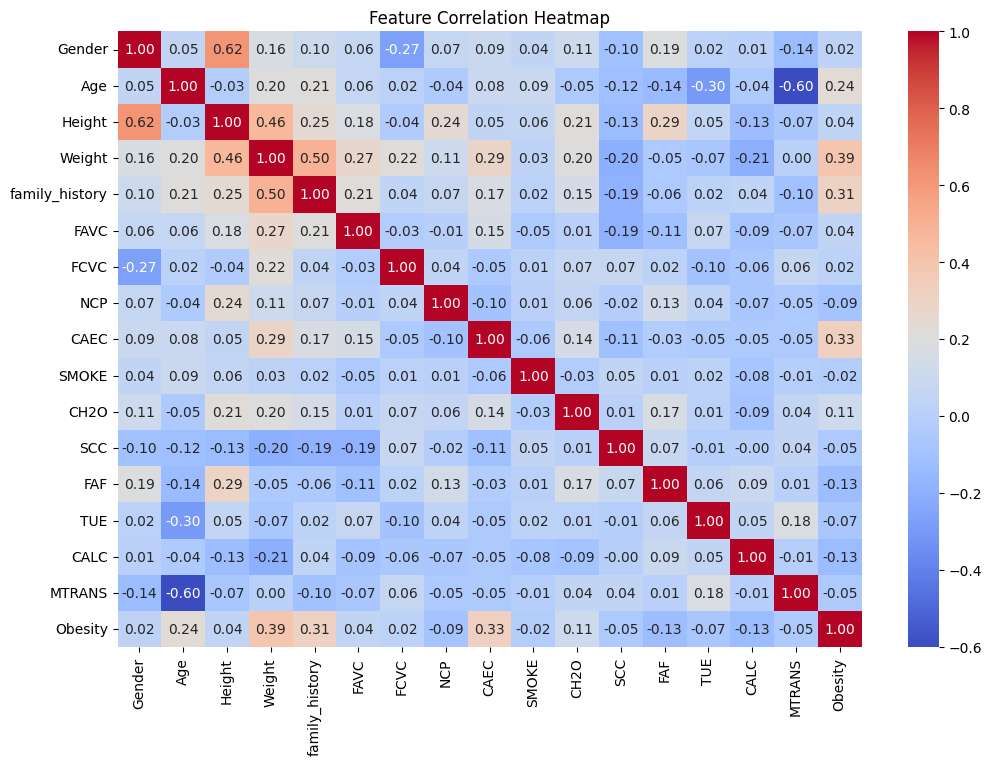

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop("Obesity", axis=1)
y = df["Obesity"]

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTrain-Test Split Done!")
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)



Train-Test Split Done!
Training Data Shape: (1688, 16)
Testing Data Shape: (423, 16)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler  # Import MinMaxScaler here

# Define features (X) and target variable (y)
X = df.drop("Obesity", axis=1)
y = df["Obesity"]

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features in X_train and X_test ONLY
scaler = MinMaxScaler()  # Create a MinMaxScaler instance

# Fit and transform on training data
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
# Transform testing data using the same scaler
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("\nTrain-Test Split Done!")
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


Train-Test Split Done!
Training Data Shape: (1688, 16)
Testing Data Shape: (423, 16)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
# Load the dataset (assuming you have already extracted the ZIP file)
df = pd.read_csv("/content/Obesity Prediction Dataset/Obesity prediction.csv")

# Display first few rows
print(df.head())


   Gender   Age  Height  Weight family_history FAVC  FCVC  NCP       CAEC  \
0  Female  21.0    1.62    64.0            yes   no   2.0  3.0  Sometimes   
1  Female  21.0    1.52    56.0            yes   no   3.0  3.0  Sometimes   
2    Male  23.0    1.80    77.0            yes   no   2.0  3.0  Sometimes   
3    Male  27.0    1.80    87.0             no   no   3.0  3.0  Sometimes   
4    Male  22.0    1.78    89.8             no   no   2.0  1.0  Sometimes   

  SMOKE  CH2O  SCC  FAF  TUE        CALC                 MTRANS  \
0    no   2.0   no  0.0  1.0          no  Public_Transportation   
1   yes   3.0  yes  3.0  0.0   Sometimes  Public_Transportation   
2    no   2.0   no  2.0  1.0  Frequently  Public_Transportation   
3    no   2.0   no  2.0  0.0  Frequently                Walking   
4    no   2.0   no  0.0  0.0   Sometimes  Public_Transportation   

               Obesity  
0        Normal_Weight  
1        Normal_Weight  
2        Normal_Weight  
3   Overweight_Level_I  
4  Overwe

<ipython-input-14-f3fdb9eea8e5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Obesity'], palette="viridis")


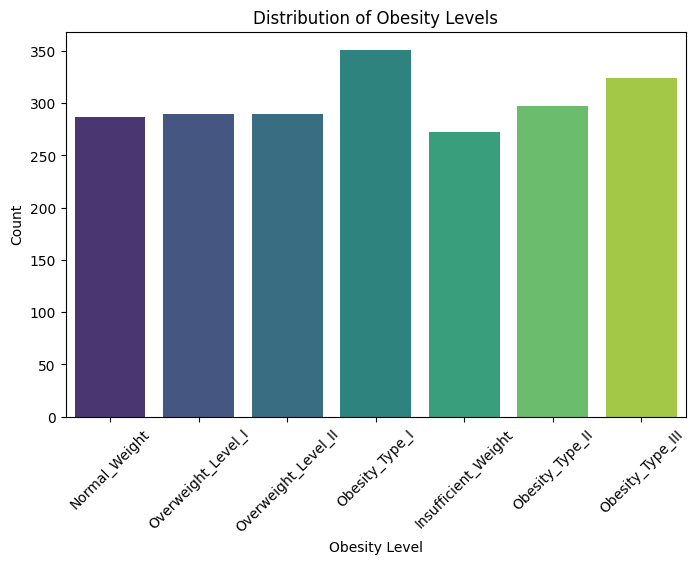

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Obesity'], palette="viridis")
plt.title("Distribution of Obesity Levels")
plt.xlabel("Obesity Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


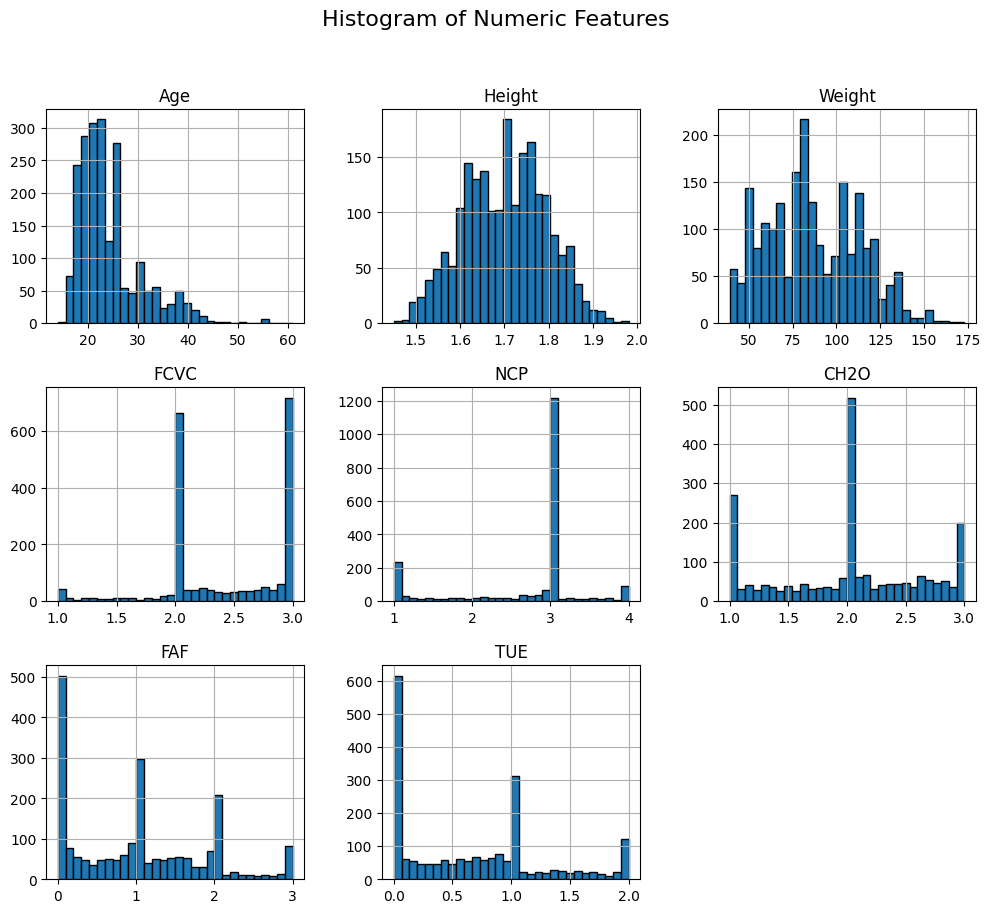

In [ ]:
df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.suptitle("Histogram of Numeric Features", fontsize=16)
plt.show()


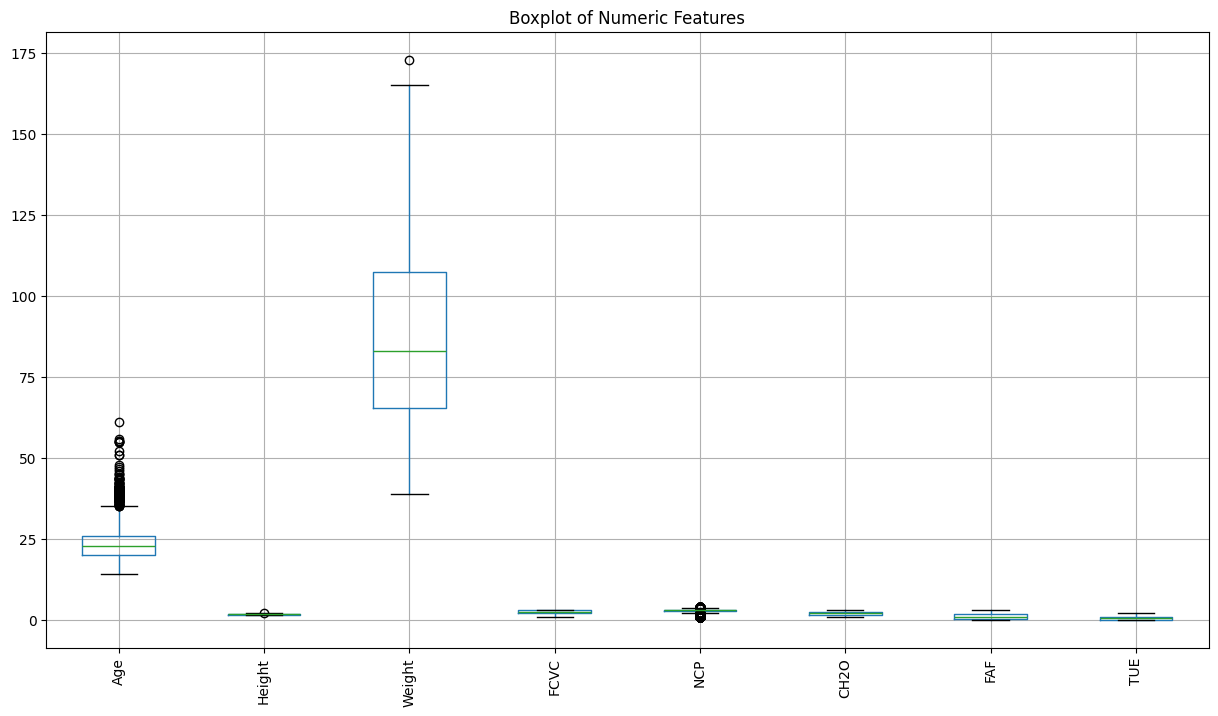

In [ ]:
plt.figure(figsize=(15, 8))
df.select_dtypes(include=['int64', 'float64']).boxplot(rot=90)
plt.title("Boxplot of Numeric Features")
plt.show()


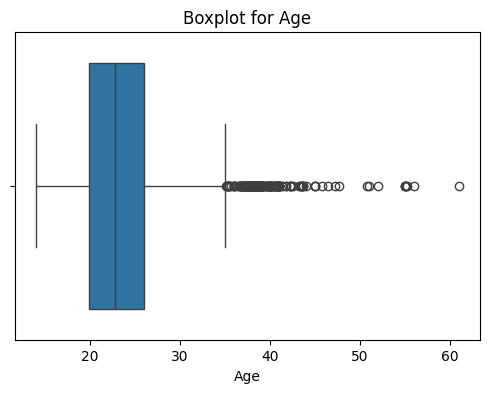

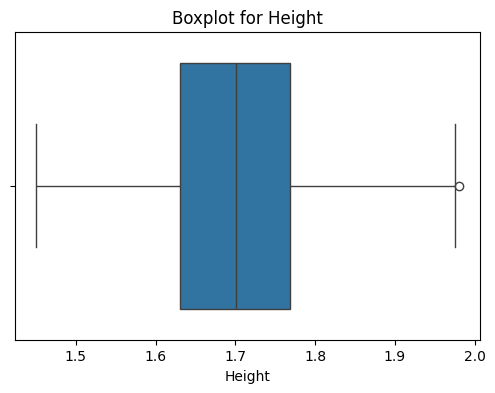

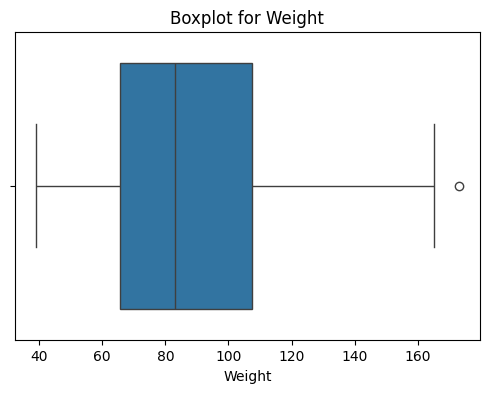

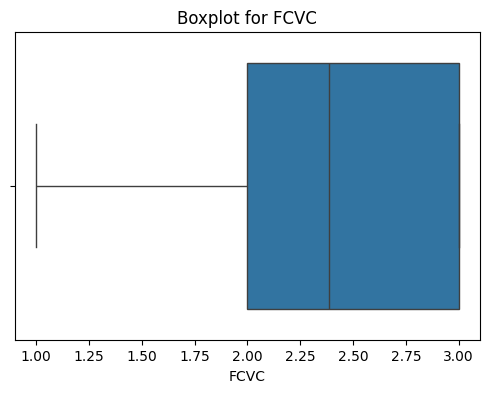

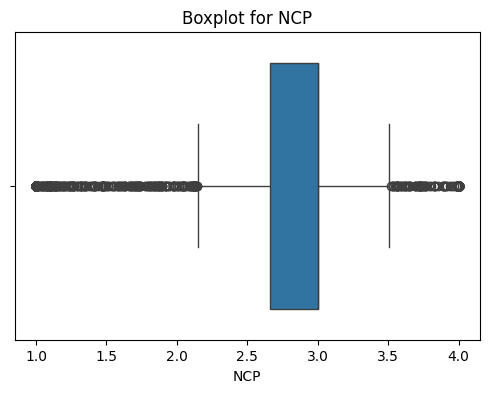

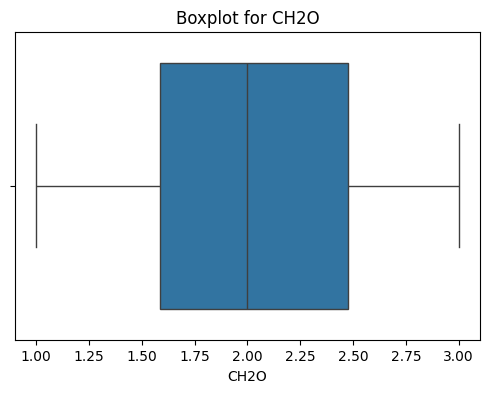

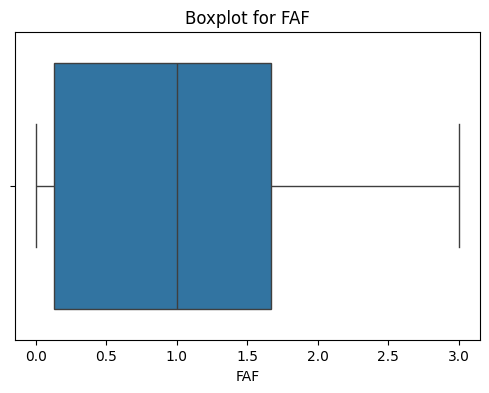

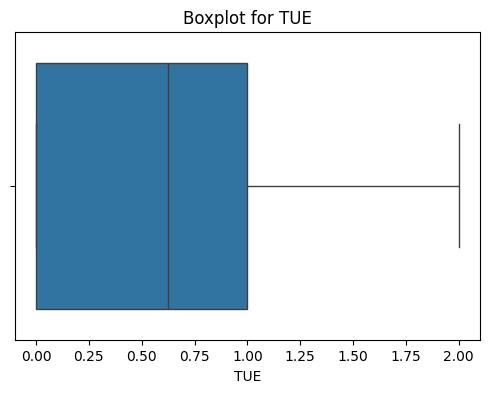

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()


In [ ]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Identify outliers for each numerical column
outliers_dict = {}
for col in numerical_cols:
    outliers_dict[col] = detect_outliers_iqr(df, col)
    print(f"Number of Outliers in {col}: {len(outliers_dict[col])}")

# Remove outliers
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("\nData after Outlier Removal:")
print(df.describe())


Number of Outliers in Age: 168
Number of Outliers in Height: 1
Number of Outliers in Weight: 1
Number of Outliers in FCVC: 0
Number of Outliers in NCP: 579
Number of Outliers in CH2O: 0
Number of Outliers in FAF: 0
Number of Outliers in TUE: 0

Data after Outlier Removal:
               Age       Height       Weight         FCVC          NCP  \
count  1398.000000  1398.000000  1398.000000  1398.000000  1398.000000   
mean     23.159011     1.714636    91.928624     2.453672     2.967898   
std       4.168997     0.087344    27.467600     0.550039     0.153043   
min      14.000000     1.450000    39.000000     1.000000     2.217651   
25%      19.904825     1.650000    70.000000     2.000000     3.000000   
50%      22.768614     1.715164    90.026086     2.550336     3.000000   
75%      25.982224     1.775539   112.820549     3.000000     3.000000   
max      35.000000     1.975663   173.000000     3.000000     3.483449   

              CH2O          FAF          TUE  
count  1398.0

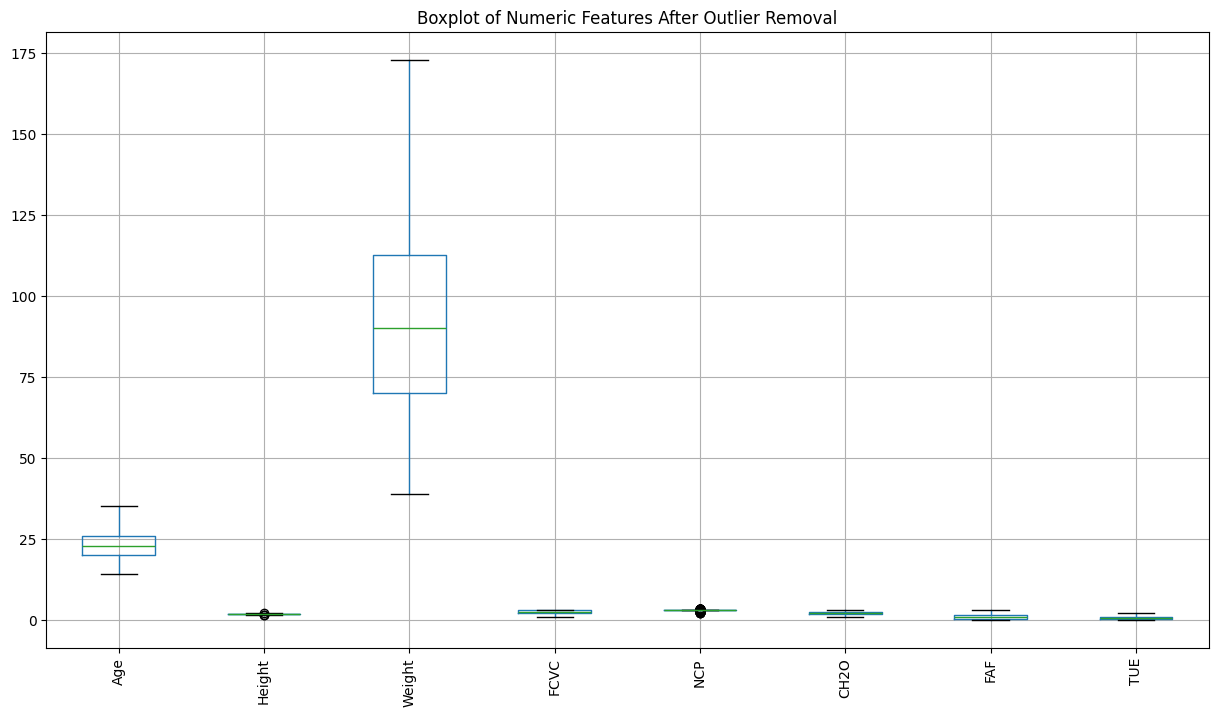

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Boxplot for all numerical features together
plt.figure(figsize=(15, 8))
df[numerical_cols].boxplot(rot=90)
plt.title("Boxplot of Numeric Features After Outlier Removal")
plt.show()


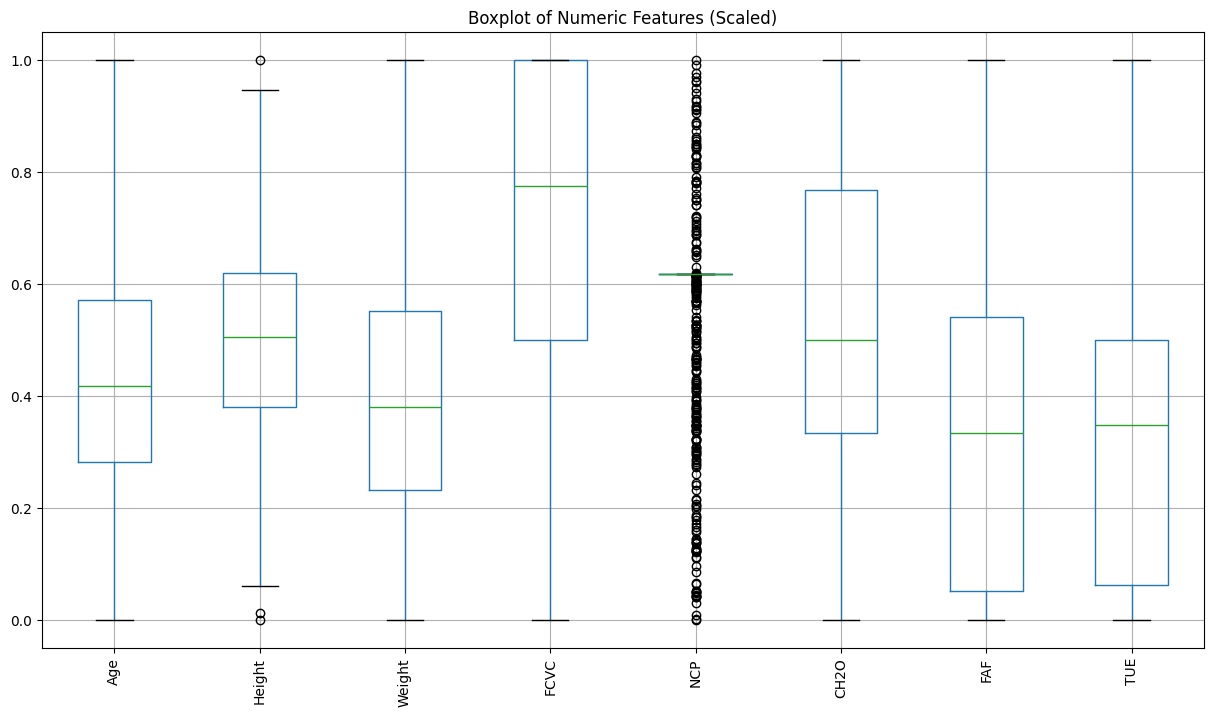

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_cols]), columns=numerical_cols)

plt.figure(figsize=(15, 8))
df_scaled.boxplot(rot=90)
plt.title("Boxplot of Numeric Features (Scaled)")
plt.show()


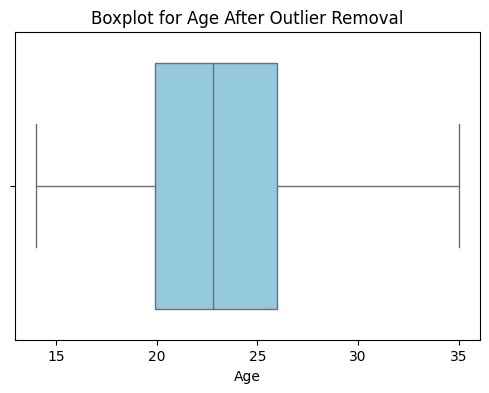

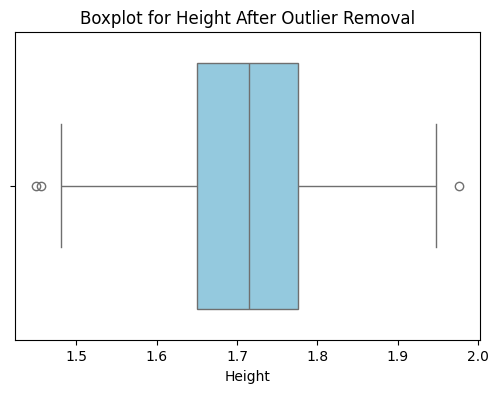

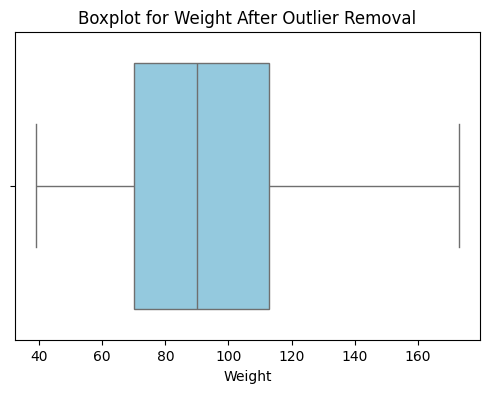

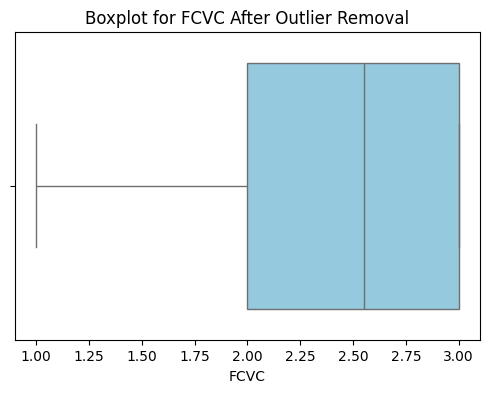

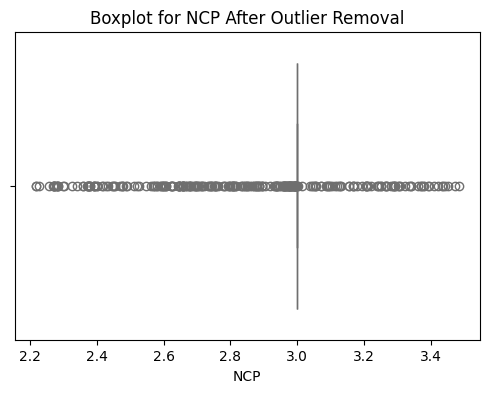

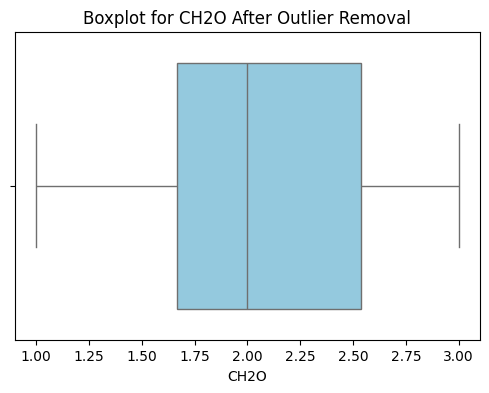

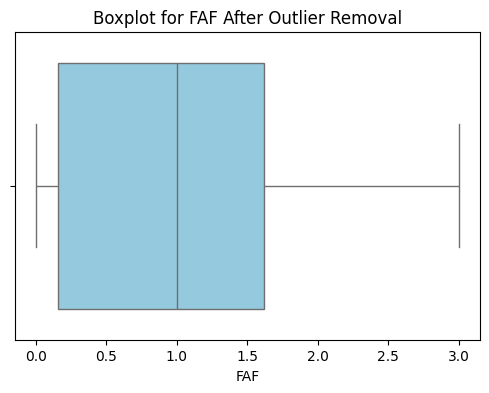

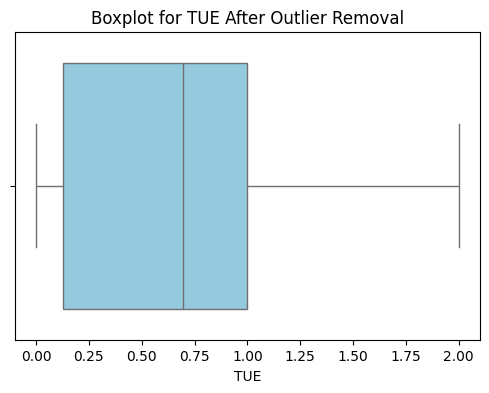

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Boxplot for {col} After Outlier Removal")
    plt.show()


<ipython-input-22-eb5fa0b0ebde>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Gender'], palette="pastel")


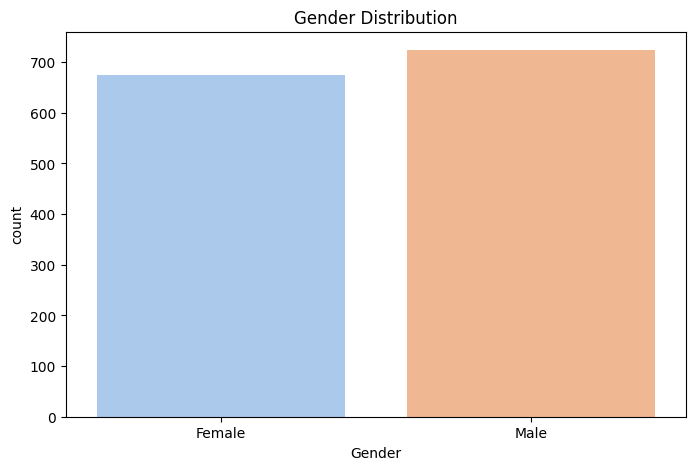

In [ ]:
#Count Plot for Categorical Features
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Gender'], palette="pastel")
plt.title("Gender Distribution")
plt.show()


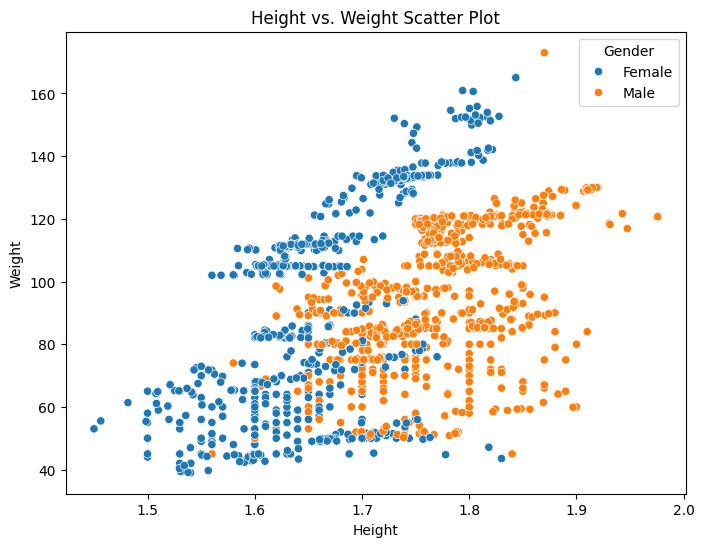

In [ ]:
#Scatter Plot (Relationship Between Two Features)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Height'], y=df['Weight'], hue=df['Gender'])
plt.title("Height vs. Weight Scatter Plot")
plt.show()


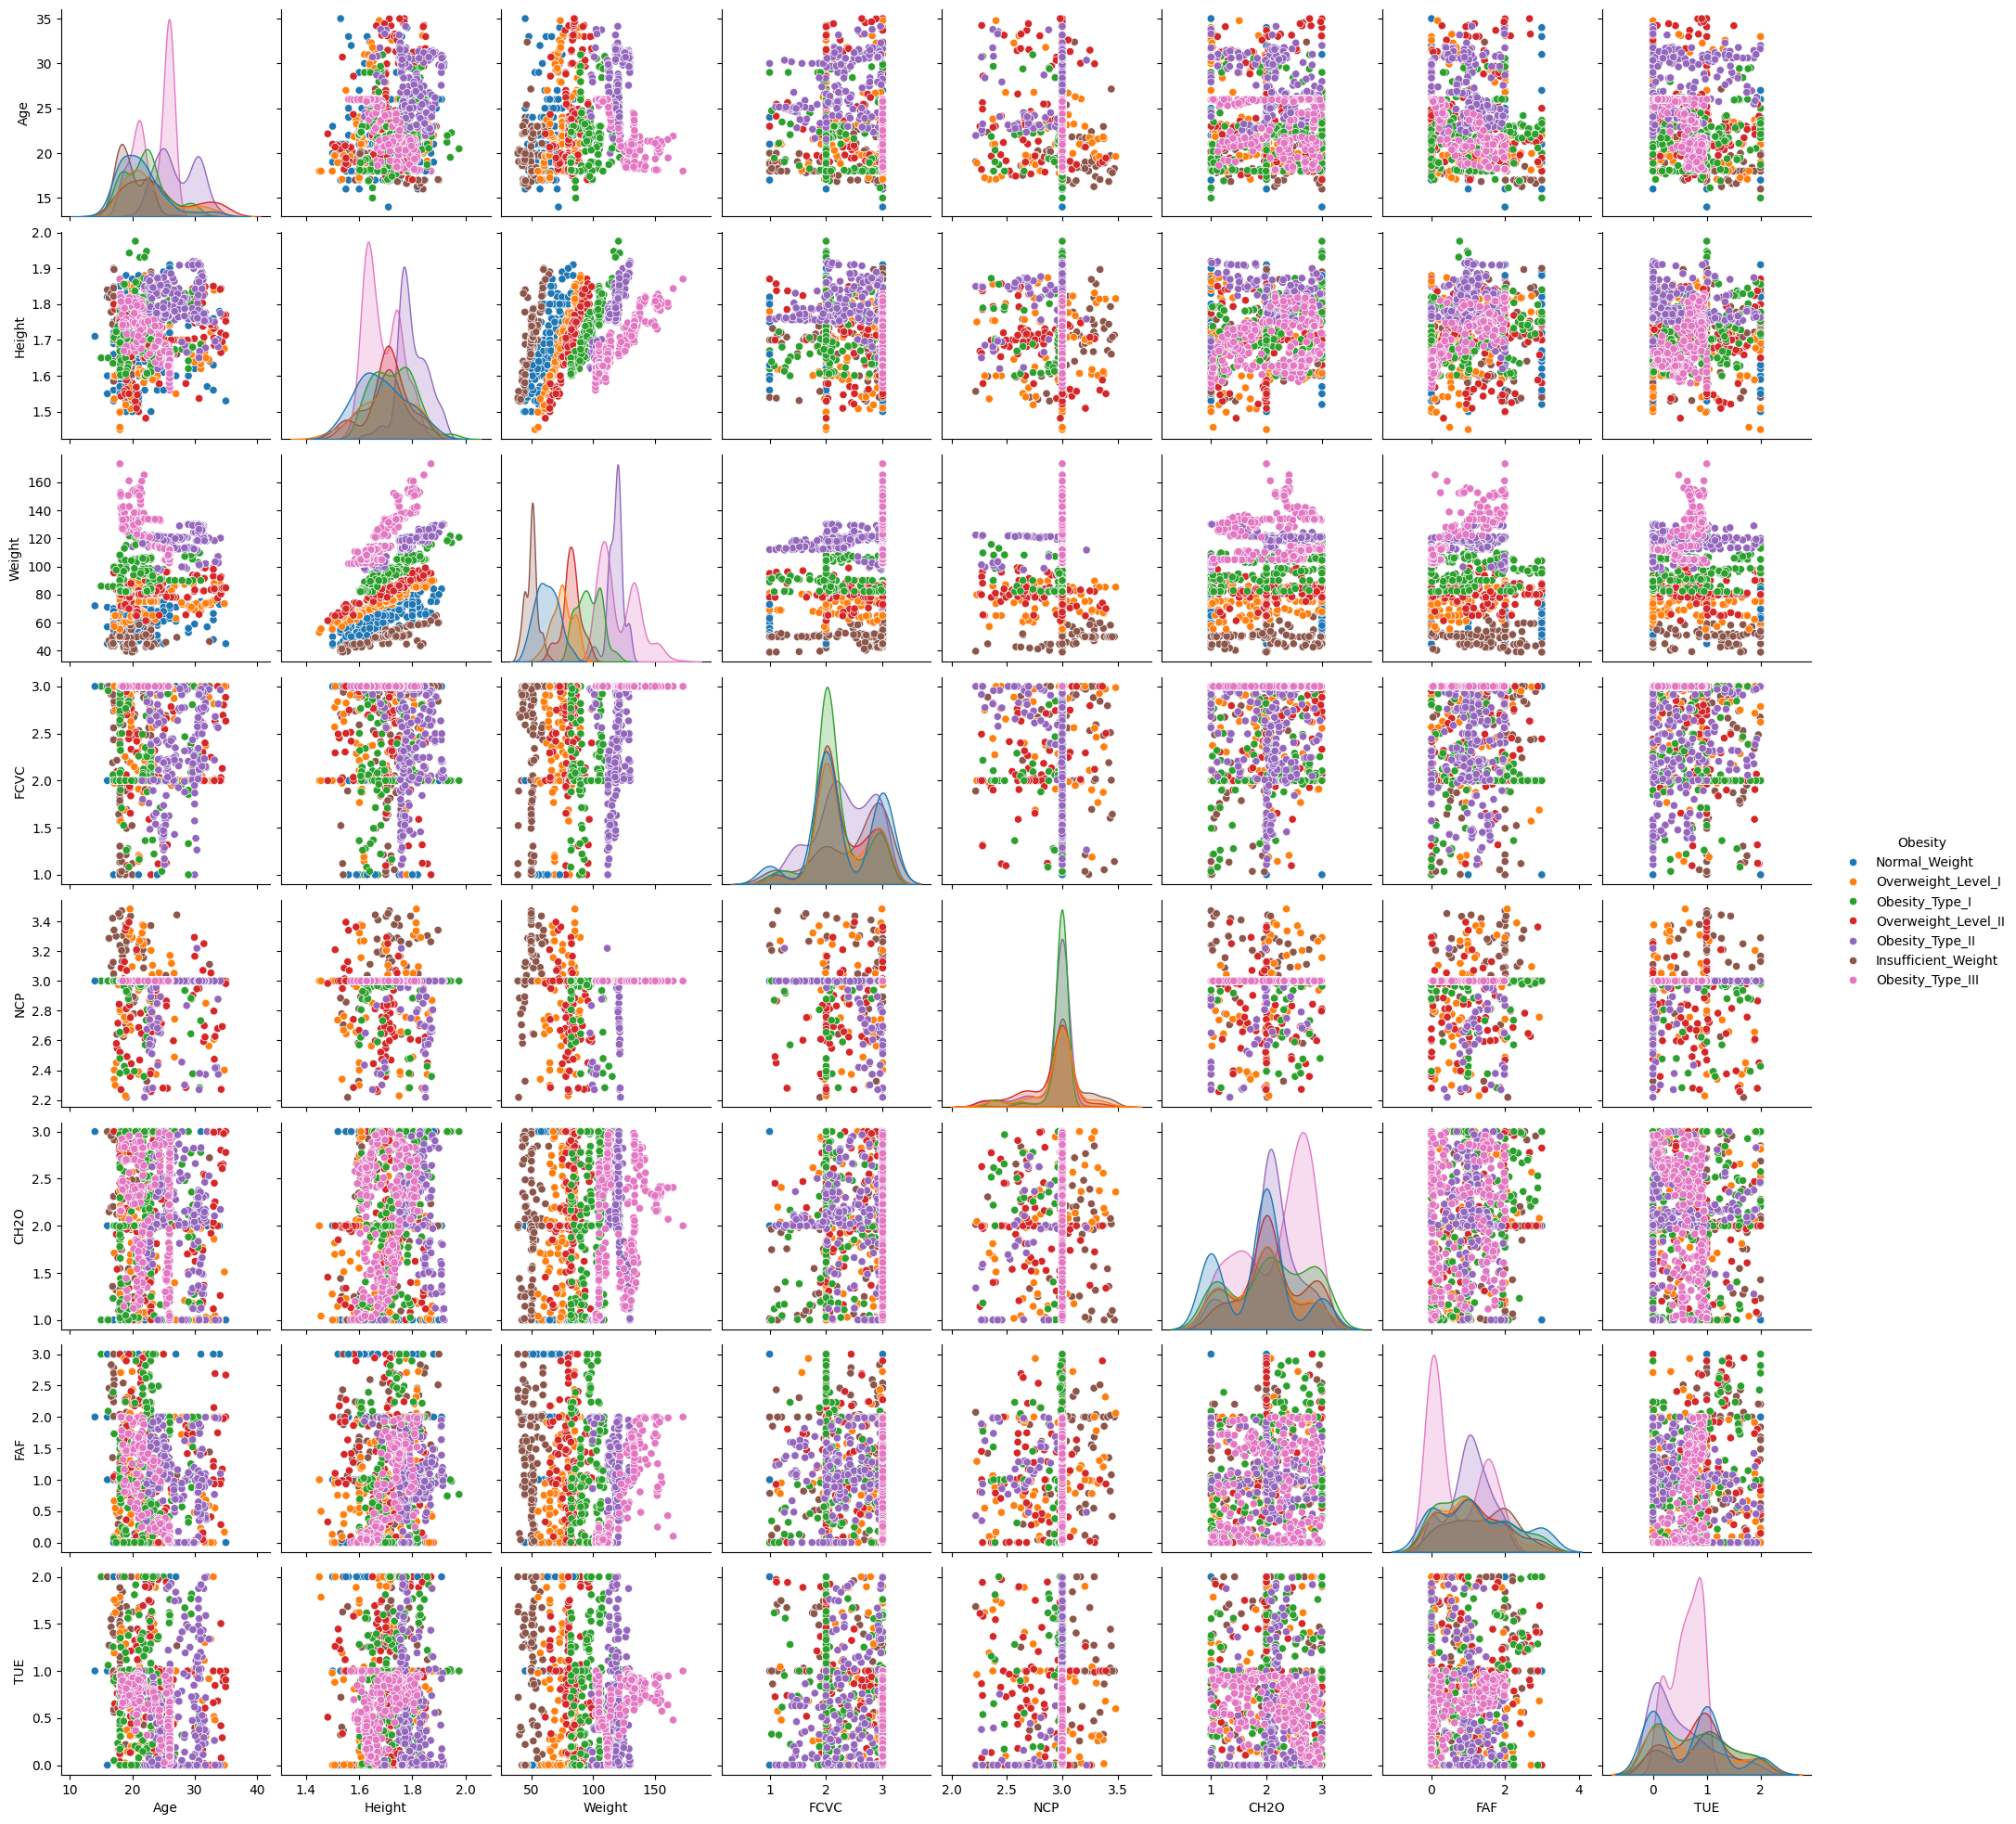

In [ ]:
#Pairplot (Pairwise Relationship in the Dataset)
sns.pairplot(df, hue="Obesity")
plt.show()

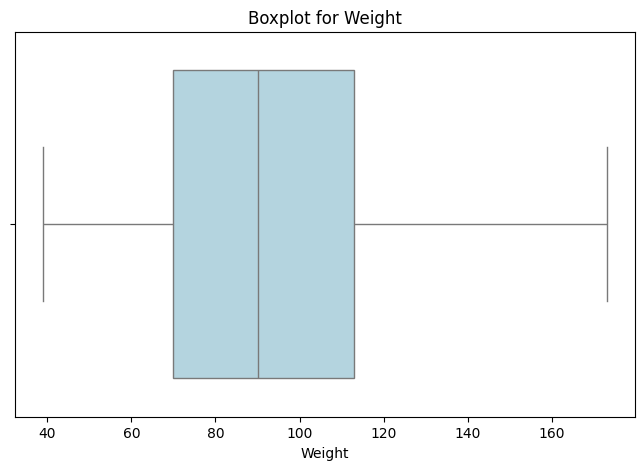

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Weight'], color="lightblue")
plt.title("Boxplot for Weight")
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats  # Import the stats module from scipy

# Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number])

# Compute skewness and kurtosis
skewness = numeric_cols.apply(stats.skew, nan_policy='omit')
kurtosis = numeric_cols.apply(stats.kurtosis, nan_policy='omit')

# Create results DataFrame
results = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurtosis})

# Display results
print("Skewness and Kurtosis of Numeric Columns:")
print(results)

Skewness and Kurtosis of Numeric Columns:
        Skewness  Kurtosis
Age     0.626994 -0.191909
Height -0.040823 -0.380101
Weight  0.037330 -0.900532
FCVC   -0.558115 -0.612075
NCP    -2.255530  8.494799
CH2O   -0.208895 -0.848012
FAF     0.492113 -0.547968
TUE     0.555506 -0.444286


In [ ]:
import pandas as pd
from scipy.stats import zscore

# Load dataset (CSV format)
df = pd.read_csv("/content/Obesity Prediction Dataset/Obesity prediction.csv")

# Apply Z-score normalization to numerical columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])  # Select numerical columns
df_zscore = df_numeric.apply(zscore)

print(df_zscore.head())


        Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
0 -0.522124 -0.875589 -0.862558 -0.785019  0.404153 -0.013073 -1.188039   
1 -0.522124 -1.947599 -1.168077  1.088342  0.404153  1.618759  2.339750   
2 -0.206889  1.054029 -0.366090 -0.785019  0.404153 -0.013073  1.163820   
3  0.423582  1.054029  0.015808  1.088342  0.404153 -0.013073  1.163820   
4 -0.364507  0.839627  0.122740 -0.785019 -2.167023 -0.013073 -1.188039   

        TUE  
0  0.561997  
1 -1.080625  
2  0.561997  
3 -1.080625  
4 -1.080625  



 **Model Performance Comparison** 
Logistic Regression Accuracy: 0.8983
Random Forest Accuracy: 0.9622


 Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        56
           1       0.94      0.71      0.81        62
           2       0.97      0.91      0.94        78
           3       0.90      0.98      0.94        58
           4       1.00      1.00      1.00        63
           5       0.79      0.80      0.80        56
           6       0.77      0.88      0.82        50

    accuracy                           0.90       423
   macro avg       0.89      0.90      0.89       423
weighted avg       0.90      0.90      0.90       423


 Random Forest Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        56
           1       0.92      0.90      0.91        62
           2       0.97      0.97      0.97        78
           3       0.97    

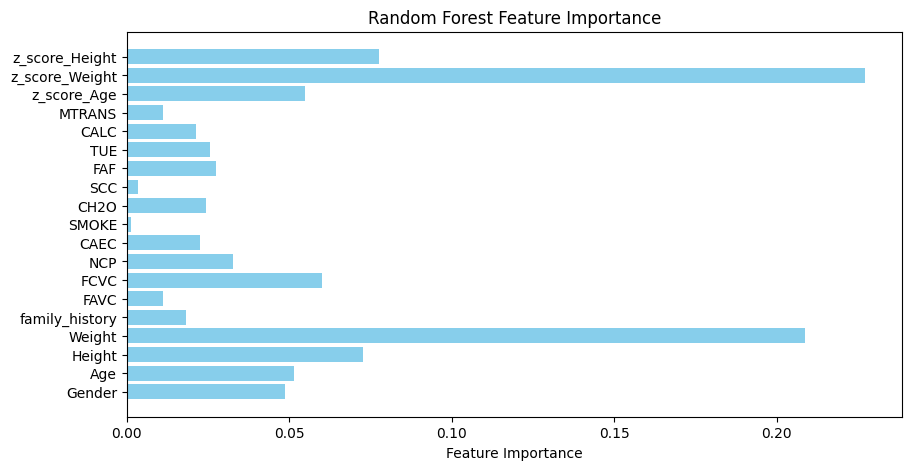

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats  # Import the stats module from scipy
from sklearn.preprocessing import LabelEncoder, StandardScaler # Import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



# Encode categorical variables if present
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Separate features (X) and target variable (y)
X = df.drop(columns=['Obesity'])  # Target column name changed to 'Obesity'
y = df['Obesity']  # Target column name changed to 'Obesity'

# Standardize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 1 **Apply Logistic Regression**
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# 2 **Apply Random Forest Classifier**
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate models
accuracy_log = accuracy_score(y_test, y_pred_log)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("\n **Model Performance Comparison** ")
print(f"Logistic Regression Accuracy: {accuracy_log:.4f}")
print(f"Random Forest Accuracy: {accuracy_rf:.4f}\n")

# Detailed classification report
print("\n Logistic Regression Report:")
print(classification_report(y_test, y_pred_log))

print("\n Random Forest Report:")
print(classification_report(y_test, y_pred_rf))

# Compare feature importance for Random Forest
import matplotlib.pyplot as plt
feature_importance = rf_model.feature_importances_
features = df.drop(columns=['Obesity']).columns # Target column name changed to 'Obesity'

plt.figure(figsize=(10, 5))
plt.barh(features, feature_importance, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

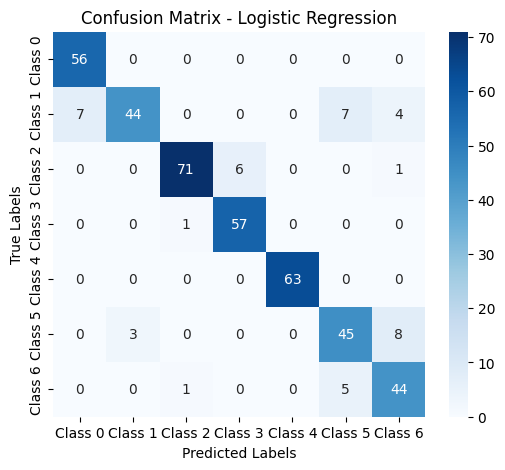

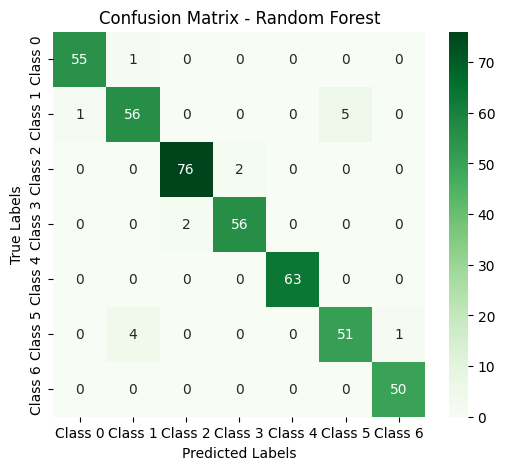

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test contains true labels and y_pred_log, y_pred_rf contain predictions from Logistic Regression & Random Forest
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot Confusion Matrix for Logistic Regression
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_log, annot=True, fmt='d', cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Plot Confusion Matrix for Random Forest
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap="Greens", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the SVC model
svc_model = SVC(kernel='rbf', C=1.0, gamma='scale')  # You can change kernel to 'linear', 'poly', or 'sigmoid' as needed

# Train the model
svc_model.fit(X_train, y_train)

# Make predictions
y_pred_svc = svc_model.predict(X_test)

# Calculate accuracy
svc_accuracy = accuracy_score(y_test, y_pred_svc)
print(f"SVC Accuracy: {svc_accuracy:.4f}")

# Print classification report
print("SVC Classification Report:")
print(classification_report(y_test, y_pred_svc))



SVC Accuracy: 0.9149
SVC Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        56
           1       0.76      0.87      0.81        62
           2       0.95      0.96      0.96        78
           3       0.97      0.98      0.97        58
           4       1.00      1.00      1.00        63
           5       0.84      0.77      0.80        56
           6       0.96      0.86      0.91        50

    accuracy                           0.91       423
   macro avg       0.92      0.91      0.91       423
weighted avg       0.92      0.91      0.92       423



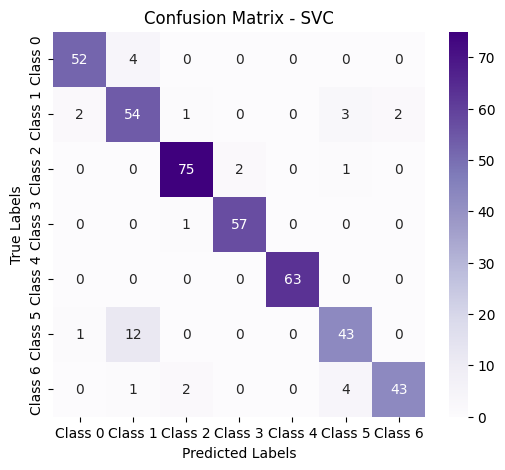

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_svc, annot=True, fmt='d', cmap="Purples", xticklabels=classes, yticklabels=classes)

# Labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - SVC')
plt.show()


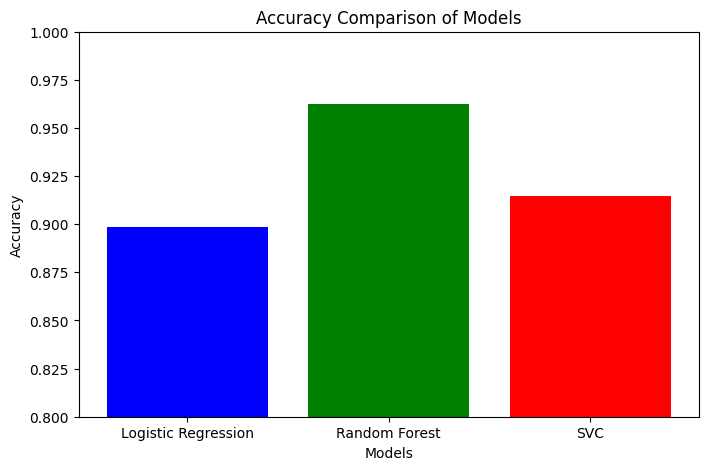

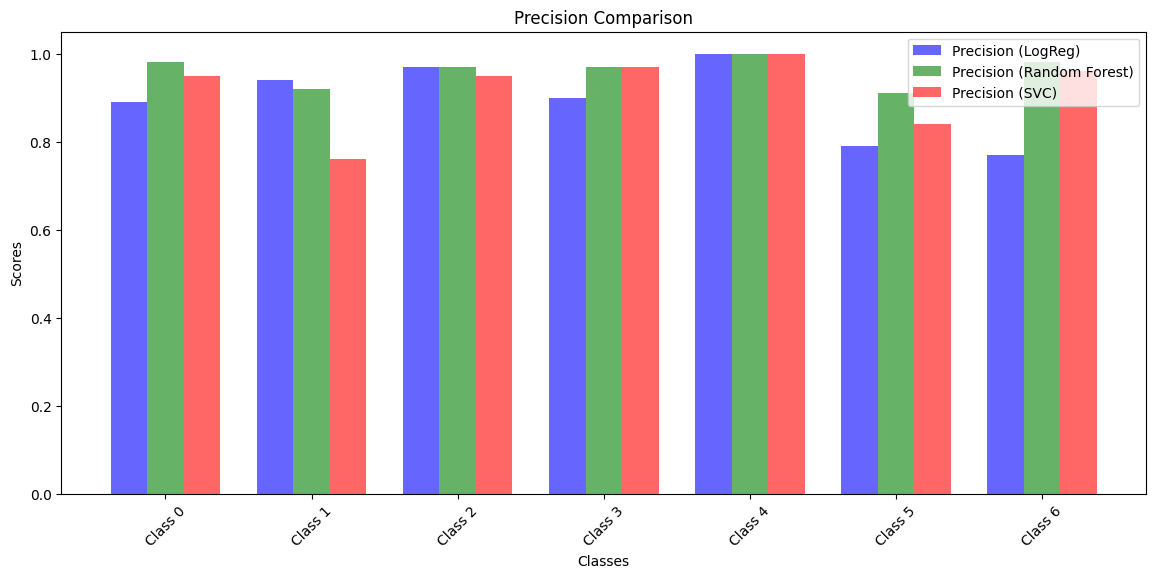

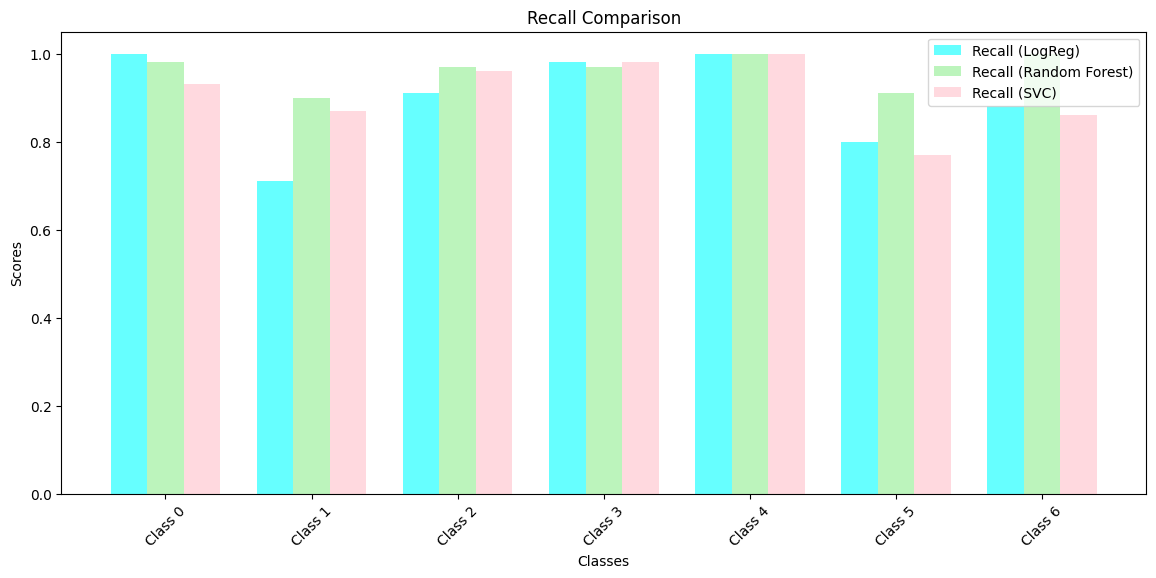

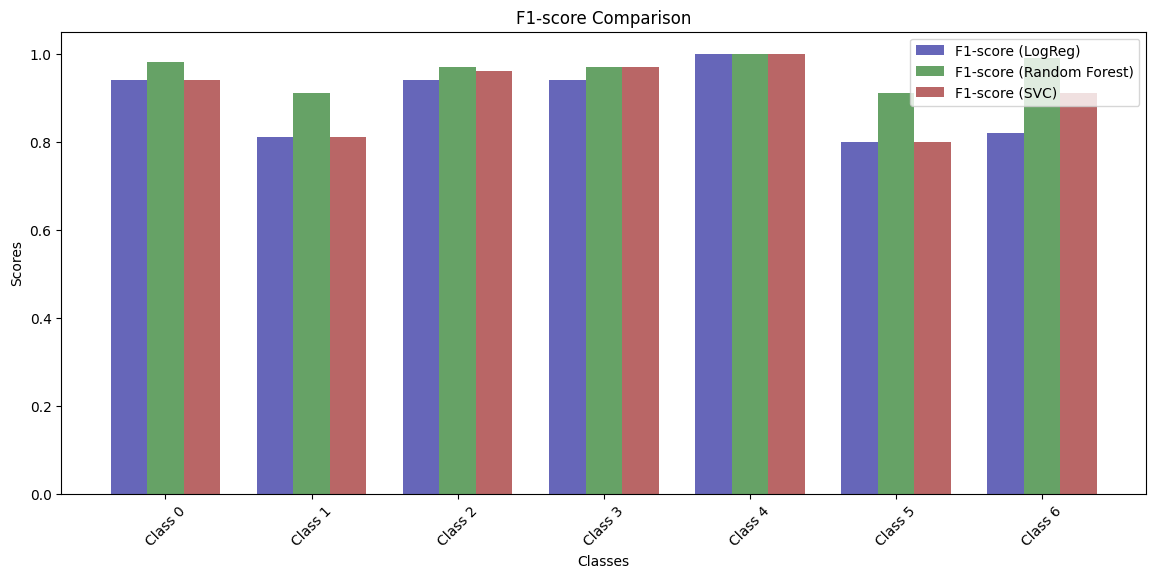

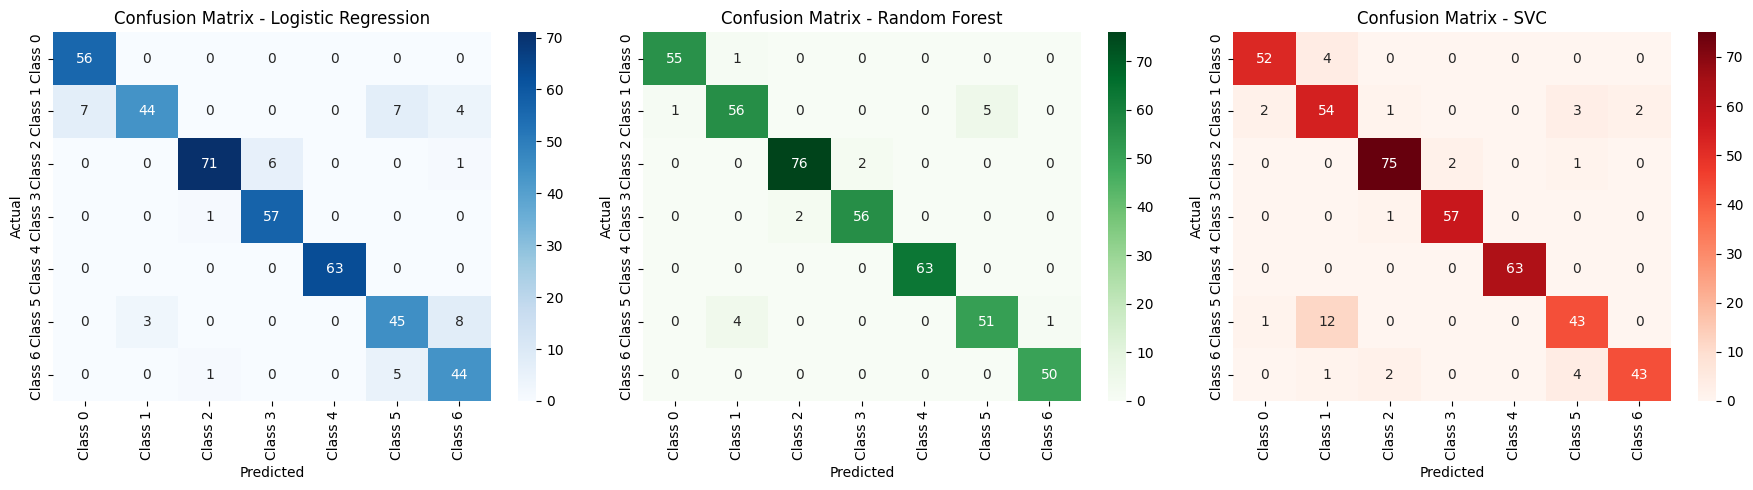

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Accuracy values
models = ["Logistic Regression", "Random Forest", "SVC"]
accuracy_values = [0.8983, 0.9622, 0.9149]  # Updated accuracy values including SVC

# Plot Accuracy Comparison
plt.figure(figsize=(8, 5))
plt.bar(models, accuracy_values, color=['blue', 'green', 'red'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Models")
plt.ylim(0.8, 1.0)
plt.show()

# Class-wise metrics
classes = ["Class 0", "Class 1", "Class 2", "Class 3", "Class 4", "Class 5", "Class 6"]

precision_log = [0.89, 0.94, 0.97, 0.90, 1.00, 0.79, 0.77]  # Updated
recall_log = [1.00, 0.71, 0.91, 0.98, 1.00, 0.80, 0.88]  # Updated
f1_log = [0.94, 0.81, 0.94, 0.94, 1.00, 0.80, 0.82]  # Updated

precision_rf = [0.98, 0.92, 0.97, 0.97, 1.00, 0.91, 0.98]  # Updated
recall_rf = [0.98, 0.90, 0.97, 0.97, 1.00, 0.91, 1.00]  # Updated
f1_rf = [0.98, 0.91, 0.97, 0.97, 1.00, 0.91, 0.99]  # Updated

precision_svc = [0.95, 0.76, 0.95, 0.97, 1.00, 0.84, 0.96]  # Extracted from SVC report
recall_svc = [0.93, 0.87, 0.96, 0.98, 1.00, 0.77, 0.86]  # Extracted from SVC report
f1_svc = [0.94, 0.81, 0.96, 0.97, 1.00, 0.80, 0.91]  # Extracted from SVC report

# Plot Precision, Recall, and F1-score Comparison
x = np.arange(len(classes))
width = 0.25

plt.figure(figsize=(14, 6))

plt.bar(x - width, precision_log, width, label="Precision (LogReg)", color='blue', alpha=0.6)
plt.bar(x, precision_rf, width, label="Precision (Random Forest)", color='green', alpha=0.6)
plt.bar(x + width, precision_svc, width, label="Precision (SVC)", color='red', alpha=0.6)

plt.xlabel("Classes")
plt.ylabel("Scores")
plt.title("Precision Comparison")
plt.xticks(x, classes, rotation=45)
plt.legend()
plt.show()

plt.figure(figsize=(14, 6))

plt.bar(x - width, recall_log, width, label="Recall (LogReg)", color='cyan', alpha=0.6)
plt.bar(x, recall_rf, width, label="Recall (Random Forest)", color='lightgreen', alpha=0.6)
plt.bar(x + width, recall_svc, width, label="Recall (SVC)", color='pink', alpha=0.6)

plt.xlabel("Classes")
plt.ylabel("Scores")
plt.title("Recall Comparison")
plt.xticks(x, classes, rotation=45)
plt.legend()
plt.show()

plt.figure(figsize=(14, 6))

plt.bar(x - width, f1_log, width, label="F1-score (LogReg)", color='darkblue', alpha=0.6)
plt.bar(x, f1_rf, width, label="F1-score (Random Forest)", color='darkgreen', alpha=0.6)
plt.bar(x + width, f1_svc, width, label="F1-score (SVC)", color='darkred', alpha=0.6)

plt.xlabel("Classes")
plt.ylabel("Scores")
plt.title("F1-score Comparison")
plt.xticks(x, classes, rotation=45)
plt.legend()
plt.show()

# Compute Confusion Matrices
conf_matrix_log = confusion_matrix(y_test, y_pred_log)  # Logistic Regression
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)  # Random Forest
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)  # SVC

# Plot Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(conf_matrix_log, annot=True, fmt='d', cmap="Blues", xticklabels=classes, yticklabels=classes, ax=axes[0])
axes[0].set_title("Confusion Matrix - Logistic Regression")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap="Greens", xticklabels=classes, yticklabels=classes, ax=axes[1])
axes[1].set_title("Confusion Matrix - Random Forest")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

sns.heatmap(conf_matrix_svc, annot=True, fmt='d', cmap="Reds", xticklabels=classes, yticklabels=classes, ax=axes[2])
axes[2].set_title("Confusion Matrix - SVC")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats.weightstats import ztest

# Load the dataset
# Assuming you have a CSV file with extracted features
data = pd.read_csv("/content/Obesity Prediction Dataset/Obesity prediction.csv")



In [ ]:

# Selecting two sample groups for testing (modify column names accordingly)
# Replace 'label' and 'feature1' with actual column names from your dataset
group1 = data[data['Gender'] == 'Female']['Height']  # Example: Using 'Gender' and 'Height' columns
group2 = data[data['Gender'] == 'Male']['Height']    # Example: Using 'Gender' and 'Height' columns

group1 = group1.dropna()
group2 = group2.dropna()

In [ ]:
# Z-test (for large samples, assuming known population variance)
z_stat, z_pval = ztest(group1, group2)
print(f"Z-test: Statistic={z_stat}, P-value={z_pval}")


Z-test: Statistic=-36.1439858729631, P-value=4.624708177063452e-286


In [ ]:
# T-test (for small samples, assuming unknown population variance)
t_stat, t_pval = stats.ttest_ind(group1, group2, equal_var=False)  # Welch's t-test
print(f"T-test: Statistic={t_stat}, P-value={t_pval}")


T-test: Statistic=-36.13035701774662, P-value=8.855036291094379e-223


In [ ]:
# ANOVA test (comparing multiple groups)
# Replace 'Obesity' and 'Height' with your desired column names
groups = [data[data['Obesity'] == label]['Height'].dropna() for label in data['Obesity'].unique()]
anova_stat, anova_pval = stats.f_oneway(*groups)
print(f"ANOVA: Statistic={anova_stat}, P-value={anova_pval}")

ANOVA: Statistic=38.43231255660025, P-value=1.6858535844061656e-44
